In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rcParams['figure.dpi'] = 150

## Unprotected Libjbn


In [2]:
u_df = pd.read_csv('unprotected.csv')
u_df

,Function,Unprotected
0,bn_addn,20
1,bn_copy,20
2,bn_eq,20
3,bn_muln,80
4,bn_set0,20
5,bn_sqrn,80
6,bn_subn,20
7,bn_test0,20


## Protected Libjbn


In [3]:
p_df = pd.read_csv('protected.csv')
p_df

,Function,Protected
0,bn_addn,40
1,bn_copy,40
2,bn_eq,40
3,bn_muln,100
4,bn_set0,40
5,bn_sqrn,100
6,bn_subn,40
7,bn_test0,60


## Comparison

In [4]:
df = pd.merge(u_df, p_df, on='Function')
df

,Function,Unprotected,Protected
0,bn_addn,20,40
1,bn_copy,20,40
2,bn_eq,20,40
3,bn_muln,80,100
4,bn_set0,20,40
5,bn_sqrn,80,100
6,bn_subn,20,40
7,bn_test0,20,60


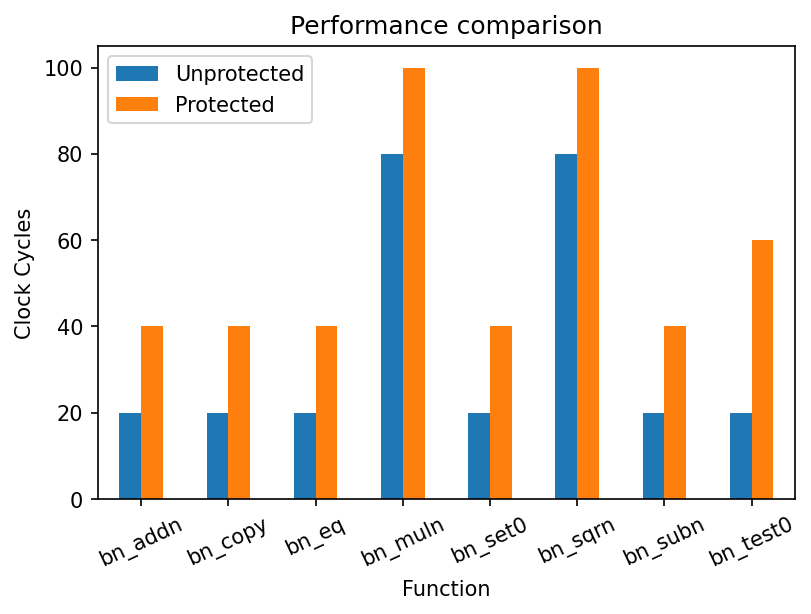

In [9]:
ax = df.plot(x="Function", y=["Unprotected", "Protected"], kind="bar", rot=25)
ax.set_title('Performance comparison')
ax.set_ylabel('Clock Cycles')
plt.show()

In [6]:
df['Overhead (%)'] = ((df['Protected'] - df['Unprotected']) / df['Unprotected']) * 100
df['Overhead (%)'] = df['Overhead (%)'].round(2)
df

,Function,Unprotected,Protected,Overhead (%)
0,bn_addn,20,40,100.0
1,bn_copy,20,40,100.0
2,bn_eq,20,40,100.0
3,bn_muln,80,100,25.0
4,bn_set0,20,40,100.0
5,bn_sqrn,80,100,25.0
6,bn_subn,20,40,100.0
7,bn_test0,20,60,200.0


In [7]:
df.to_csv('bn_comparison.csv', index=False)